In [1]:
from experiments.PNB.ARUNet_Artery_Network import ARUNet_Artery_Network
from utils.ARGUS_vfold_setup import *
from utils.ARGUS_UNet_train_test import *
from utils.ARGUS_visualization import *
import argparse

In [2]:
img_folder = "/data/barry.ravichandran/repos/AnatomicRecon-POCUS-AI/PNB/Data_PNB/annotations_yuri/"
annotations_folder = "/data/barry.ravichandran/repos/AnatomicRecon-POCUS-AI/PNB/Data_PNB/annotations_yuri/CLEANED/"

p_prefix = [' 11',
            ' 67', 
            ' 93', 
            ' 94', 
            ' 134', 
            ' 211', 
            ' 222A',  
            ' 153', 
            ' 240',  
            ' 193']
n_prefix = [' 57',
        ' 136', 
        ' 179', 
        ' 189', 
        ' 204', 
        ' 205', 
        ' 217', 
        ' 238',  
        ' 39',
        ' 191']

myNetwork = ARUNet_Artery_Network()

In [3]:
setup_vfold_files(myNetwork,
                img_dir=img_folder,
                anno_dir=annotations_folder,
                p_prefix=p_prefix,
                n_prefix=n_prefix)



Total size of images in the dataset: 
2.4898208379745483 gibibyte


Total size of labels in the dataset: 
0.012151464819908142 gibibyte


Num images / labels = 25 25


0 [[' 11'], [' 57']]
1 [[' 67'], [' 136']]
2 [[' 93'], [' 179']]
3 [[' 94'], [' 189']]
4 [[' 134'], [' 204']]
5 [[' 211'], [' 205']]
6 [[' 222A'], [' 217']]
7 [[' 153'], [' 238']]
8 [[' 240'], [' 39']]
9 [[' 193'], [' 191']]


18 5 2
19 4 2
19 4 2
19 4 2
18 4 3
17 5 3
16 6 3
16 6 3
16 6 3
17 6 2


In [4]:
setup_testing_vfold(myNetwork,
                    vfold_num=0)

Loading dataset: 100%|██████████| 2/2 [00:05<00:00,  2.76s/it]


In [5]:
runs = [0,1]
# test_outputs, test_images, test_labels = [test_vfold(myNetwork, model_type="best", run_id=r, device_num=0) for r in runs]
test_outputs_list = []
test_images_list = []
test_labels_list = []
for r in runs:
    print(r)
    test_outputs, test_images, test_labels = test_vfold(myNetwork, model_type="best", run_id=r, device_num=0)
    test_outputs_list.append(test_outputs)
    test_images_list.append(test_images)
    test_labels_list.append(test_labels)

0
1


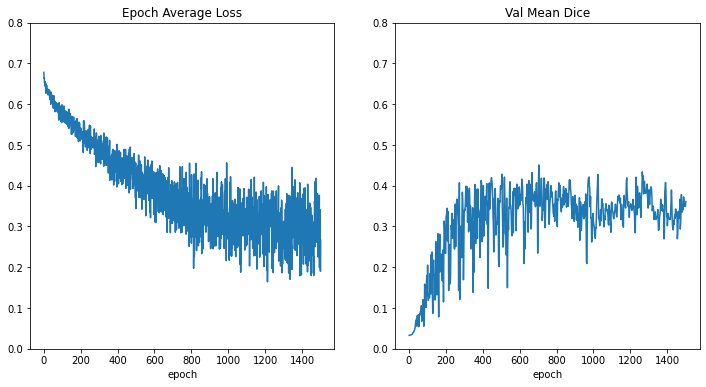

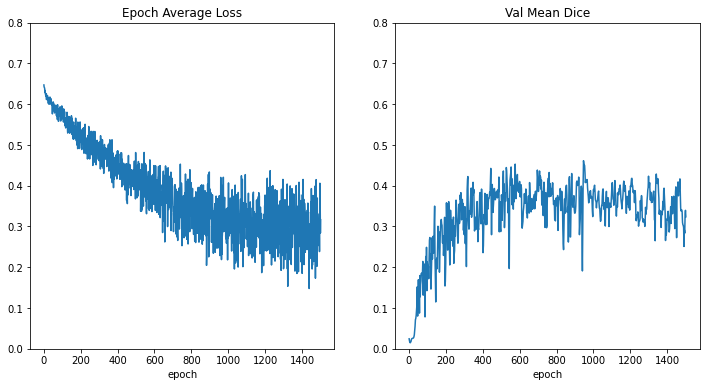

In [6]:
view_metric_curves(myNetwork, 
                vfold_num=0, 
                run_id=0)
view_metric_curves(myNetwork, 
                vfold_num=0, 
                run_id=1)

VFOLD = 0 of 9
Image: 5. 191 AC_Video 5_cropM.nii.gz


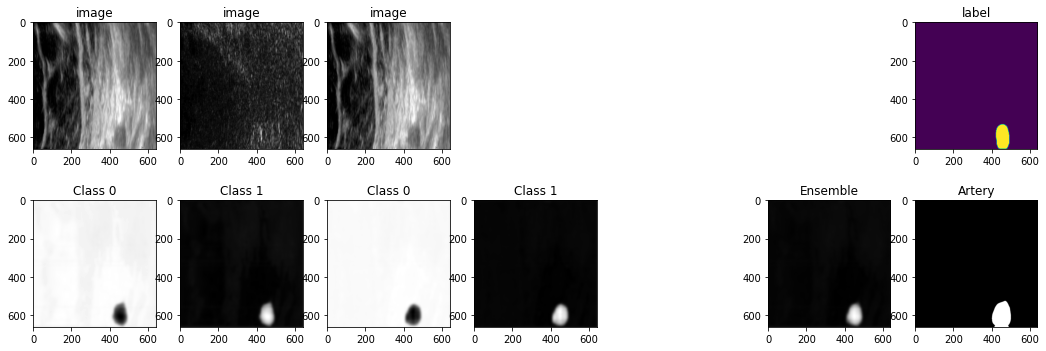

Image: 7. 193 AC Video 4_cropM.nii.gz


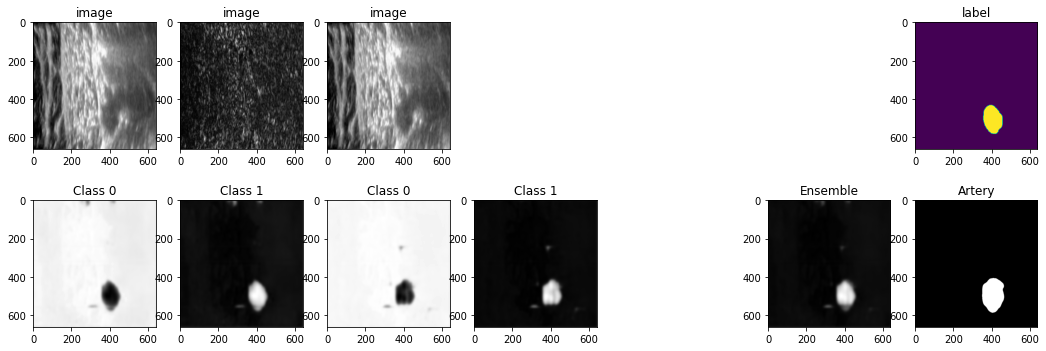

In [8]:
view_testing_results_vfold(myNetwork,
                        test_outputs=test_outputs_list,
                        test_images=test_images_list,
                        test_labels=test_labels_list,
                        model_type="best",
                        run_id=[0,1], 
                        device_num=0)